In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from stargazer.stargazer import Stargazer
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import add_constant
import json
import geopandas as gpd
import plotly.graph_objects as go
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [663]:
df = pd.read_csv("data/df_final.csv")

In [664]:
df.head()

,Unnamed: 0,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung
0,0,30,39919,0.0,29,K1814,NaN,Bayern
1,1,41,53430,0.0,27,K1544,NaN,Baden-Württemberg
2,2,64,73163,0.0,32,K1945,NaN,Baden-Württemberg
3,3,41,36761,0.0,44,K1825,NaN,Baden-Württemberg
4,4,35,42684,1.0,33,K1144,NaN,Nordrhein-Westfalen


<font size = "7.5"> Abschlusspraesentation </font>

<i>Einfuehrung in Python fuer Data Analytics</i>

<i>HWR Berlin, Wintersemester 2023-2024</i>

<i>Goekan Goerer und David Kryzanovskij </i>

# 1. Wie viele Autos wurden verkauft?

In [665]:
Anzahl_Autos = df["Preis"].notna().sum()
print("Es wurden insgesamt", Anzahl_Autos, "verkauft")

Es wurden insgesamt 1104 verkauft


# 2. Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [666]:
Hoechst_Preis = df["Preis"].max()
print("Der Höchstpreis betrug", Hoechst_Preis )

Mindest_Preis = df["Preis"].min()
print("Der Mindestpreis betrug", Mindest_Preis)

AVG_Preis = df["Preis"].mean()
print("Der Durchschnittspreis betrug", AVG_Preis )

Der Höchstpreis betrug 165482.31
Der Mindestpreis betrug 21471.65
Der Durchschnittspreis betrug 88975.19871376811


# 3. Wie hoch war der Gesamtumsatz?

In [667]:
Gesamt_Umsatz = df["Preis"].sum()
print("Der Gesamtumsatz beträgt", Gesamt_Umsatz)

Der Gesamtumsatz beträgt 98228619.38


# 4. Wie viele Autos wurden pro Bundesland verkauft?

In [668]:
autos_pro_bundesland = df.groupby('Niederlassung')['Preis'].count()
autos_pro_bundesland

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Düsseldorf               1
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    174
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64

In [669]:
germany_map = gpd.read_file("data/polygons.json")
germany_map.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,86,DEU,Germany,1,Baden-Württemberg,None,None,Land,State,"MULTIPOLYGON (((9.65046 49.77634, 9.65684 49.7..."
1,86,DEU,Germany,2,Bayern,None,Bavaria,Land,State,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
2,86,DEU,Germany,3,Berlin,None,None,Land,State,"POLYGON ((13.16181 52.59442, 13.21621 52.58252..."
3,86,DEU,Germany,4,Brandenburg,None,None,Land,State,"POLYGON ((13.87951 53.50107, 13.87310 53.49915..."
4,86,DEU,Germany,5,Bremen,None,None,Land,State,"POLYGON ((8.98545 53.12822, 8.94874 53.12380, ..."


In [670]:
germany_map = germany_map.rename(columns={"NAME_1":"id"})
germany_map.head()

,ID_0,ISO,NAME_0,ID_1,id,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,86,DEU,Germany,1,Baden-Württemberg,None,None,Land,State,"MULTIPOLYGON (((9.65046 49.77634, 9.65684 49.7..."
1,86,DEU,Germany,2,Bayern,None,Bavaria,Land,State,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
2,86,DEU,Germany,3,Berlin,None,None,Land,State,"POLYGON ((13.16181 52.59442, 13.21621 52.58252..."
3,86,DEU,Germany,4,Brandenburg,None,None,Land,State,"POLYGON ((13.87951 53.50107, 13.87310 53.49915..."
4,86,DEU,Germany,5,Bremen,None,None,Land,State,"POLYGON ((8.98545 53.12822, 8.94874 53.12380, ..."


In [671]:
germany_map = germany_map.loc[:, ["id", "geometry"]]
germany_map.head()

,id,geometry
0,Baden-Württemberg,"MULTIPOLYGON (((9.65046 49.77634, 9.65684 49.7..."
1,Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
2,Berlin,"POLYGON ((13.16181 52.59442, 13.21621 52.58252..."
3,Brandenburg,"POLYGON ((13.87951 53.50107, 13.87310 53.49915..."
4,Bremen,"POLYGON ((8.98545 53.12822, 8.94874 53.12380, ..."


In [672]:
data = {
    'id': ['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Düsseldorf', 'Hamburg', 'Hessen', 'Niedersachsen', 'Nordrhein-Westfalen', 'Sachsen', 'Thüringen'],
    'Anzahl der Verkäufe': [205, 188, 126, 37, 1, 43, 96, 96, 174, 89, 49]
}
germany_info = pd.DataFrame(data)
germany_info

,id,Anzahl der Verkäufe
0,Baden-Württemberg,205
1,Bayern,188
2,Berlin,126
3,Brandenburg,37
4,Düsseldorf,1
5,Hamburg,43
6,Hessen,96
7,Niedersachsen,96
8,Nordrhein-Westfalen,174
9,Sachsen,89


In [673]:
germany_map_merged = pd.merge(germany_map, germany_info)
germany_map_merged

,id,geometry,Anzahl der Verkäufe
0,Baden-Württemberg,"MULTIPOLYGON (((9.65046 49.77634, 9.65684 49.7...",205
1,Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252...",188
2,Berlin,"POLYGON ((13.16181 52.59442, 13.21621 52.58252...",126
3,Brandenburg,"POLYGON ((13.87951 53.50107, 13.87310 53.49915...",37
4,Hamburg,"POLYGON ((10.07162 53.71823, 10.08402 53.72935...",43
5,Hessen,"POLYGON ((9.49877 51.63152, 9.52809 51.62835, ...",96
6,Niedersachsen,"MULTIPOLYGON (((8.68083 53.89208, 8.68917 53.8...",96
7,Nordrhein-Westfalen,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ...",174
8,Sachsen,"POLYGON ((12.87800 51.67270, 12.87158 51.66171...",89
9,Thüringen,"POLYGON ((10.77189 51.64491, 10.81994 51.64079...",49


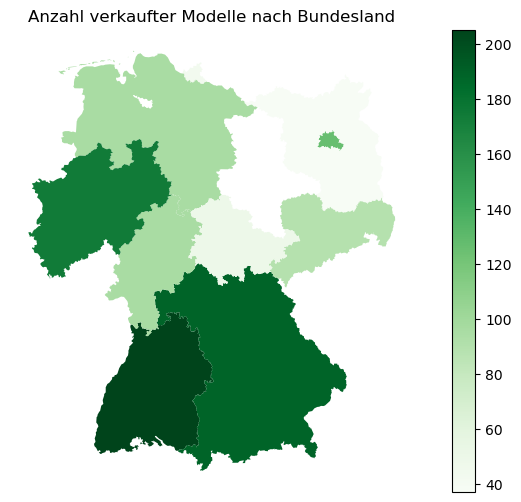

In [674]:
fig, ax = plt.subplots(1, figsize = (10, 6))
germany_map_merged.plot(column = "Anzahl der Verkäufe", ax = ax,
                        cmap = "Greens", legend = True)

ax.axis("off")
ax.set_title("Anzahl verkaufter Modelle nach Bundesland")
plt.show();

# 5. Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [675]:
auto_preis_pro_bundesland = df.groupby('Niederlassung')['Preis'].mean()
auto_preis_pro_bundesland

Niederlassung
Baden-Württemberg       90969.560000
Bayern                  89344.313245
Berlin                  89584.984048
Brandenburg             86673.640811
Düsseldorf             120215.500000
Hamburg                 85549.499070
Hessen                  85864.929479
Niedersachsen           87963.312500
Nordrhein-Westfalen     88451.758103
Sachsen                 89455.080674
Thüringen               90816.994082
Name: Preis, dtype: float64

In [676]:
germany_map = gpd.read_file("data/polygons.json")

In [677]:
germany_map = germany_map.rename(columns={"NAME_1":"id"})

In [678]:
germany_map = germany_map.loc[:, ["id", "geometry"]]

In [679]:
data_niederlassung = {
    'id': ['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Düsseldorf', 'Hamburg', 'Hessen', 'Niedersachsen', 'Nordrhein-Westfalen', 'Sachsen', 'Thüringen'],
    'Preis': [90969.560000, 89344.313245, 89584.984048, 86673.640811, 120215.500000, 85549.499070, 85864.929479, 87963.312500, 88451.758103, 89455.080674, 90816.994082]
}
germany_info = pd.DataFrame(data_niederlassung)
germany_info

,id,Preis
0,Baden-Württemberg,90969.560000
1,Bayern,89344.313245
2,Berlin,89584.984048
3,Brandenburg,86673.640811
4,Düsseldorf,120215.500000
5,Hamburg,85549.499070
6,Hessen,85864.929479
7,Niedersachsen,87963.312500
8,Nordrhein-Westfalen,88451.758103
9,Sachsen,89455.080674


In [680]:
germany_map_merged1 = pd.merge(germany_map, germany_info)
germany_map_merged1

,id,geometry,Preis
0,Baden-Württemberg,"MULTIPOLYGON (((9.65046 49.77634, 9.65684 49.7...",90969.560000
1,Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252...",89344.313245
2,Berlin,"POLYGON ((13.16181 52.59442, 13.21621 52.58252...",89584.984048
3,Brandenburg,"POLYGON ((13.87951 53.50107, 13.87310 53.49915...",86673.640811
4,Hamburg,"POLYGON ((10.07162 53.71823, 10.08402 53.72935...",85549.499070
5,Hessen,"POLYGON ((9.49877 51.63152, 9.52809 51.62835, ...",85864.929479
6,Niedersachsen,"MULTIPOLYGON (((8.68083 53.89208, 8.68917 53.8...",87963.312500
7,Nordrhein-Westfalen,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ...",88451.758103
8,Sachsen,"POLYGON ((12.87800 51.67270, 12.87158 51.66171...",89455.080674
9,Thüringen,"POLYGON ((10.77189 51.64491, 10.81994 51.64079...",90816.994082


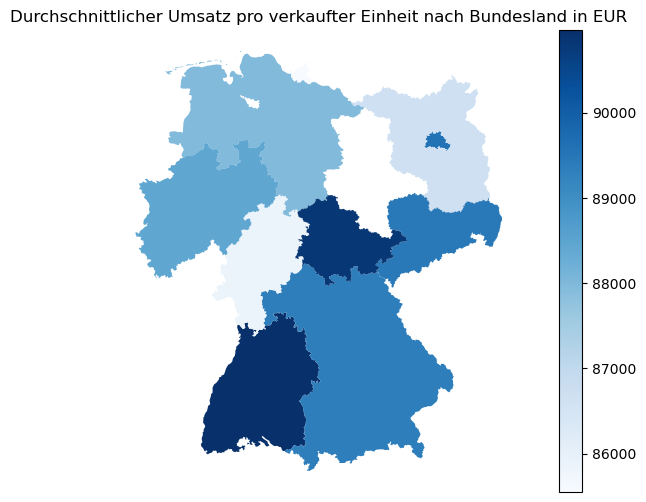

In [681]:
fig, ax = plt.subplots(1, figsize = (10, 6))
germany_map_merged1.plot(column = "Preis", ax = ax,
                        cmap = "Blues", legend = True)

ax.axis("off")
ax.set_title("Durchschnittlicher Umsatz pro verkaufter Einheit nach Bundesland in EUR")
plt.show();

In [682]:
# 3 key findinds: in thüringen verkaufen wir wenig aber für viel (mehr in thüringen investieren)
 # baden würtemberg läuft sehr gut(verkaufen viel für viel)
    # kein geschäft in Sachsen-Anhalt

# 6. Haben mehr Frauen oder mehr Maenner unsere Autos gekauft?

In [683]:
anzahl_frauen = df[df['Geschlecht'] == 0]['Preis'].count()
anzahl_maenner = df[df['Geschlecht'] == 1]['Preis'].count()

if anzahl_frauen > anzahl_maenner: 
    print("Die Anzahl der Frauen war hoeher:", anzahl_frauen, ", die Anzahl der Maenner dagegen war", anzahl_maenner)
else: 
    print("Die Anzahl der Maenner war hoeher:", anzahl_maenner, ", die Anzahl der Frauen dagegen war", anzahl_frauen)

Die Anzahl der Maenner war hoeher: 706 , die Anzahl der Frauen dagegen war 398


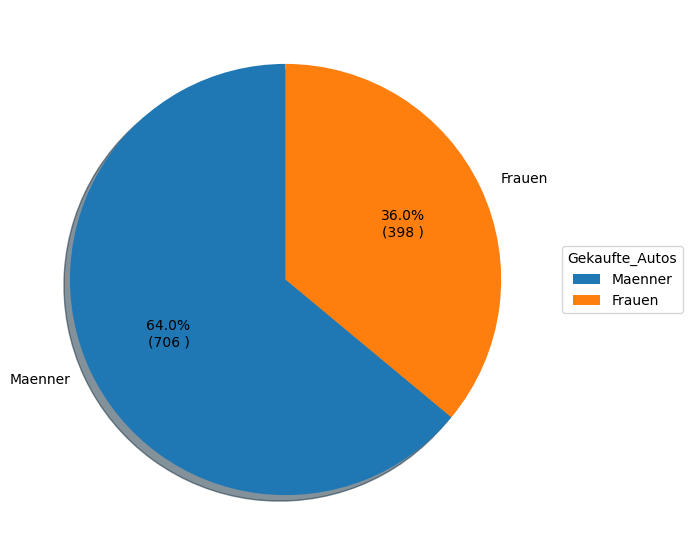

In [711]:
Gekaufte_Autos = ['Maenner', 'Frauen']
data = [706.5, 398]
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),labels = Gekaufte_Autos,shadow=True,startangle=90,textprops=dict(color ="black"))
ax.legend(
          title ="Gekaufte_Autos", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))

# 7. Wie hoch ist das Durchschnittsalter unserer Kunden?

In [685]:
durchschnittsalter = df[df['Preis'].isna()]['Alter'].mean()
print("Das Durchschnittsalter unserer Kunden betrug", durchschnittsalter)

Das Durchschnittsalter unserer Kunden betrug 49.88103254769921


# 8. Wie hoch ist das Durchschnittsalter der Besucher in unseren Showrooms?

In [686]:
durchschnittsalter = df[df['Preis'].isna()]['Alter'].mean()
print("Das Durchschnittsalter der Besucher unseres Showrooms beträgt", durchschnittsalter)

Das Durchschnittsalter der Besucher unseres Showrooms beträgt 49.88103254769921


# 9. Was ist das Durchschnittsalter unserer männlichen Kunden?

In [687]:
maennliche_kunden_mit_preis = df[(df['Geschlecht'] == 1) & (~df['Preis'].isna())]
durchschnittsalter_maennliche_kunden = maennliche_kunden_mit_preis['Alter'].mean()
print("Das Durchschnittsalter unserer männlichen Kunden beträgt", durchschnittsalter_maennliche_kunden)

Das Durchschnittsalter unserer männlichen Kunden beträgt 50.45892351274787


# 10. Wie hoch ist das Durchschnittseinkommen unserer Kunden?

In [688]:
anzahl_maenner = df[df['Geschlecht'] == 1]

In [689]:
kunden_mit_preis = ~df['Preis'].isna()
durchschnittseinkommen = anzahl_maenner[anzahl_maenner["Preis"].isna()]['Einkommen'].mean()
print("Das Durchschnittseinkommen unserer Kunden beträgt", durchschnittseinkommen)

Das Durchschnittseinkommen unserer Kunden beträgt 58844.53786407767


# 11. Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit? (nur für die Kunden)

In [690]:
selected_columns = ["Alter", "Einkommen", "Preis", "Zeit"]

new_df = df[selected_columns]

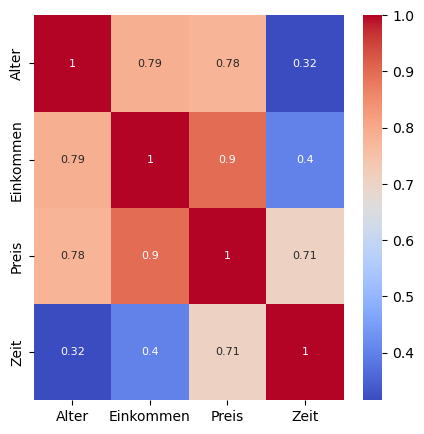

In [691]:
plt.figure(figsize = (5, 5))

sns.heatmap(
    new_df.select_dtypes(np.number).corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 8}
);
plt.show()

# 12. Wie ist die Variable Zeit verteilt? (Kunden und Besucher zusammen)

C:\Users\s_goerer20\AppData\Local\Temp\ipykernel_7656\1193611392.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Zeit"])


<Axes: xlabel='Zeit', ylabel='Density'>

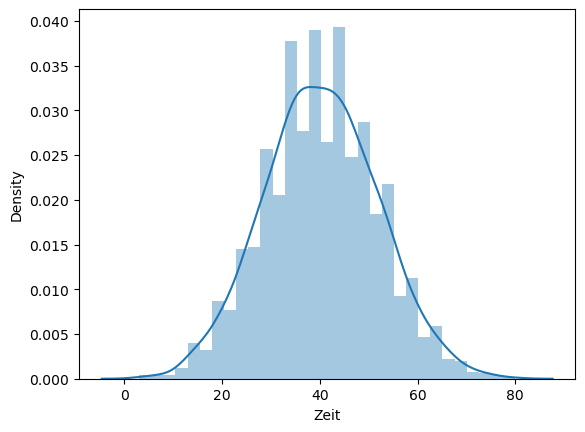

In [692]:
sns.distplot(df["Zeit"])

# 13. Wie viele Kunden haben keinen Kredit bei der Bank genommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu sammeln. Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen, das höher als der Autopreis ist, keinen Bankkredit benötigten

In [693]:
Anzahl_Kreditnehmer = (df['Preis'] > df['Einkommen']).sum()
print("Es haben insgesamt" ,Anzahl_Kreditnehmer, "Kunden einen Kredit aufgenommen")

Es haben insgesamt 1099 Kunden einen Kredit aufgenommen


# 14. Welches sind die sozioökonomischen Merkmale der Kunden, die den Kaufpreis beeinflussen? Wählen Sie die geeigneten abhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode

In [694]:
model = smf.ols("Preis ~ Alter + Geschlecht + Einkommen", data=df).fit()
Stargazer([model])

In [695]:
model = sm.OLS.from_formula("Preis ~ Alter + Geschlecht + Einkommen", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1768.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:21:58   Log-Likelihood:                -11749.
No. Observations:                1104   AIC:                         2.351e+04
Df Residuals:                    1100   BIC:                         2.353e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    909.5363   1390.088      0.654      0.513   -1817.988    3637.061
Alter        478.6882     39.476     12.126      0.000     401.232     556.145
Geschlecht  2140.9389    636.899      3.362      0.001     891.264    3390.614
Einkommen      1.0626      0.029     37.163      0.000       1.006       1.119
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.279
Skew:                           0.016   Prob(JB):                        0.527
Kurtosis:                       2.836   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 15. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro

In [696]:
from statsmodels.api import add_constant

In [697]:
X_predict = pd.DataFrame({
    'Alter': [32, 51],           
    'Geschlecht': [1, 1],
    'Einkommen': [30000, 54000] 
})

X_predict = add_constant(X_predict, has_constant='add')
X_predict

,const,Alter,Geschlecht,Einkommen
0,1.0,32,1,30000
1,1.0,51,1,54000


In [698]:
predicted_preis = model.predict(X_predict)
predicted_preis

0    50245.383433
1    84841.968072
dtype: float64

# 16. In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen direkt vergleichbar sein. Wie sollen die Daten transformiert werden? Tipp: Beta-Werte.

In [699]:
scaler_X = StandardScaler()

In [700]:
df[['Alter', 'Geschlecht', 'Einkommen']] = scaler_X.fit_transform(df[['Alter', 'Geschlecht', 'Einkommen']])

In [701]:
scaler_y = StandardScaler()

In [702]:
df['Preis'] = scaler_y.fit_transform(df[['Preis']])

In [703]:
try:
    model = sm.OLS.from_formula("Preis ~ Alter + Geschlecht + Einkommen", data=df).fit()
    print(model.summary())
except Exception as e:
    print(f"Error: {str(e)}")

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1768.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:21:58   Log-Likelihood:                -593.99
No. Observations:                1104   AIC:                             1196.
Df Residuals:                    1100   BIC:                             1216.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0024      0.013      0.191      0.8

# 17. Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode. Tipp: Logistische Regression.

In [704]:
df = pd.read_csv("data/df_final.csv")
df['gekauft_1'] = df['Preis'].notna().astype(int)

In [705]:
df.tail()

,Unnamed: 0,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,gekauft_1
1990,1990,70,69581,1.0,51,K0467,103751.58,Thüringen,1
1991,1991,38,48301,1.0,33,K0122,64230.98,Niedersachsen,1
1992,1992,67,63547,1.0,41,K1045,103123.57,Berlin,1
1993,1993,37,32686,1.0,36,K1096,49215.87,Baden-Württemberg,1
1994,1994,55,71240,1.0,49,K0861,106132.59,Bayern,1


In [706]:
reg1_gekauft = smf.logit('gekauft_1 ~ Alter + Geschlecht + Einkommen + Zeit', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.579041
         Iterations 6


In [707]:
reg1_gekauft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              gekauft_1   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Jan 2024   Pseudo R-squ.:                  0.1577
Time:                        19:21:59   Log-Likelihood:                -1155.2
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 2.638e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4424      0.263     -9.269      0.000      -2.959      -1.926
Alter          0.0180      0.007      2.623      0.009       0.005       0.031
Geschlecht     0.2464      0.103      2.393      0.017       0.045       0.448
Einkommen  -4.208e-05   5.43e-06     -7.753      0.000   -5.27e-05   -3.14e-05
Zeit           0.1022      0.006     17.530      0.000       0.091       0.114
==============================================================================
"""

In [708]:
Stargazer([reg1_gekauft])

# 18. Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

In [709]:
Y_predict = pd.DataFrame({
    'Alter': [32, 51],           
    'Geschlecht': [1, 1],
    'Einkommen': [30000, 54000],
    "Zeit": [30, 45]
})

Y_predict = add_constant(Y_predict, has_constant='add')
Y_predict

,const,Alter,Geschlecht,Einkommen,Zeit
0,1.0,32,1,30000,30
1,1.0,51,1,54000,45


In [710]:
predicted_preis = reg1_gekauft.predict(Y_predict)
(predicted_preis*100)

0    54.561387
1    74.032531
dtype: float64

# 19. Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten durchgeführt haben.

geo_df = pd.read_csv("data/geo.txt", sep = "\t")
kunden_df["Einkommen"] = kunden_df["Einkommen"].astype("int")
geo_df["Niederlassung"] = geo_df["Niederlassung"].replace(["Berlin-Charlottenburg", "Berlin-Mitte", "BERLIN"], "Berlin")
data_df.loc[data_df['KundeNr'].isin(["K0701", "K1021"]), 'Einkommen'] = int(data_df['Einkommen'].median())

# 20. Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? Welche zusätzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschläge.

Wir würden unserer Kundenabteilung vorschlagen in Zukunft Informationen, über den hoechsten abgeschlossenen Bildungsgrad unserer Kunden, als auch das Datum des Kaufes zu sammeln. 